In [30]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
from pystackreg import StackReg
import multiprocessing as mp
import timeit
from tqdm import tqdm
from tifffile import TiffFile
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [2]:
# need to change
ipts="33267"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [4]:
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(ob_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [5]:
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/dc"
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(dc_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [6]:
###################### need to change start
sample_name = "2024_11_02_hold_to_700C_27"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2024_11_03_OB_redo")
dc_dir = os.path.join(dc_loc, "2024_11_02_hold_to_700C_35_DC")
###################### need to change end

# Sort and filter scan files

In [7]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
print(len(fname_list))
fname_list

9001


['FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0021.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0022

In [8]:
to_rmv = [
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

9001
9001


In [9]:
ob_list = os.listdir(ob_dir)
# fname_list.pop(0)
ob_list.sort()
print(len(ob_list))
# ob_list = ob_list[:3]
ob_list

1008


['OB_1fps_2x2_0001_0994.tiff',
 'OB_1fps_2x2_0001_0995.tiff',
 'OB_1fps_2x2_0001_0996.tiff',
 'OB_1fps_2x2_0001_0997.tiff',
 'OB_1fps_2x2_0001_0998.tiff',
 'OB_1fps_2x2_0001_0999.tiff',
 'OB_1fps_2x2_0001_1000.tiff',
 'OB_1fps_2x2_0001_1001.tiff',
 'OB_1fps_2x2_0001_1002.tiff',
 'OB_1fps_2x2_0001_1003.tiff',
 'OB_1fps_2x2_0001_1004.tiff',
 'OB_1fps_2x2_0001_1005.tiff',
 'OB_1fps_2x2_0001_1006.tiff',
 'OB_1fps_2x2_0001_1007.tiff',
 'OB_1fps_2x2_0001_1008.tiff',
 'OB_1fps_2x2_0001_1009.tiff',
 'OB_1fps_2x2_0001_1010.tiff',
 'OB_1fps_2x2_0001_1011.tiff',
 'OB_1fps_2x2_0001_1012.tiff',
 'OB_1fps_2x2_0001_1013.tiff',
 'OB_1s_0001_0006.tiff',
 'OB_1s_0001_0007.tiff',
 'OB_1s_0001_0008.tiff',
 'OB_1s_0001_0009.tiff',
 'OB_1s_0001_0010.tiff',
 'OB_1s_0001_0011.tiff',
 'OB_1s_0001_0012.tiff',
 'OB_1s_0001_0013.tiff',
 'OB_1s_0001_0014.tiff',
 'OB_1s_0001_0015.tiff',
 'OB_1s_0001_0016.tiff',
 'OB_1s_0001_0017.tiff',
 'OB_1s_0001_0018.tiff',
 'OB_1s_0001_0019.tiff',
 'OB_1s_0001_0020.tiff',
 'OB_

In [10]:
to_rmv = [
    "OB_71fps_2x2_0001_0793.tiff",
]
ob_list = rocku.remove_fnames(ob_list, to_rmv)
ob_list = rocku.filter_list(ob_list, '_71fps_2x2_')
print(len(ob_list))
ob_list

1008
1007
200


['OB_71fps_2x2_0001_0794.tiff',
 'OB_71fps_2x2_0001_0795.tiff',
 'OB_71fps_2x2_0001_0796.tiff',
 'OB_71fps_2x2_0001_0797.tiff',
 'OB_71fps_2x2_0001_0798.tiff',
 'OB_71fps_2x2_0001_0799.tiff',
 'OB_71fps_2x2_0001_0800.tiff',
 'OB_71fps_2x2_0001_0801.tiff',
 'OB_71fps_2x2_0001_0802.tiff',
 'OB_71fps_2x2_0001_0803.tiff',
 'OB_71fps_2x2_0001_0804.tiff',
 'OB_71fps_2x2_0001_0805.tiff',
 'OB_71fps_2x2_0001_0806.tiff',
 'OB_71fps_2x2_0001_0807.tiff',
 'OB_71fps_2x2_0001_0808.tiff',
 'OB_71fps_2x2_0001_0809.tiff',
 'OB_71fps_2x2_0001_0810.tiff',
 'OB_71fps_2x2_0001_0811.tiff',
 'OB_71fps_2x2_0001_0812.tiff',
 'OB_71fps_2x2_0001_0813.tiff',
 'OB_71fps_2x2_0001_0814.tiff',
 'OB_71fps_2x2_0001_0815.tiff',
 'OB_71fps_2x2_0001_0816.tiff',
 'OB_71fps_2x2_0001_0817.tiff',
 'OB_71fps_2x2_0001_0818.tiff',
 'OB_71fps_2x2_0001_0819.tiff',
 'OB_71fps_2x2_0001_0820.tiff',
 'OB_71fps_2x2_0001_0821.tiff',
 'OB_71fps_2x2_0001_0822.tiff',
 'OB_71fps_2x2_0001_0823.tiff',
 'OB_71fps_2x2_0001_0824.tiff',
 'OB_71f

In [11]:
dc_list = os.listdir(dc_dir)
# fname_list.pop(0)
dc_list.sort()
print(len(dc_list))
dc_list

201


['FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0021.tiff',


In [12]:
to_rmv = [
    'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_9002.tiff'
]
dc_list = rocku.remove_fnames(dc_list, to_rmv)

201
200


In [13]:
scan_exposure_list = rocku.get_exposure_list(fname_list)
ob_exposure_list = rocku.get_exposure_list(ob_list)
dc_exposure_list = rocku.get_exposure_list(dc_list)
exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
exposure_list

['_0001_']

In [14]:
_fname_list = rocku.filter_list(fname_list, exposure_list[0])
_fname_list

['FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0021.tiff',
 'FLiNaK_2_16mm_71fps_2x2_1ccm_0001_0022

In [15]:
######### Scan
_scan_raw = rocku.read_tiff_stack(scan_dir, [_fname_list[0], _fname_list[-1]])
print(_scan_raw.shape)

2


(2, 1023, 1024)


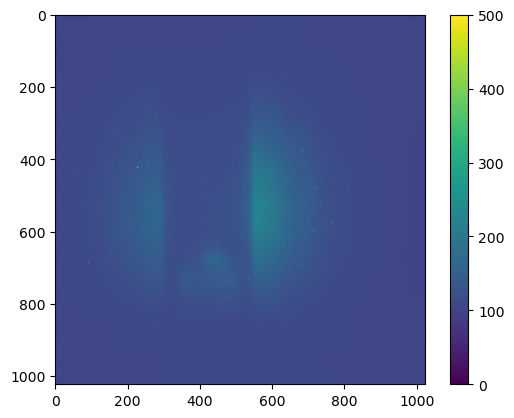

In [16]:
_scan_min = np.min(_scan_raw, axis=0)
plt.imshow(_scan_min, vmin=0, vmax=500)
plt.colorbar()
plt.show()

ROI:


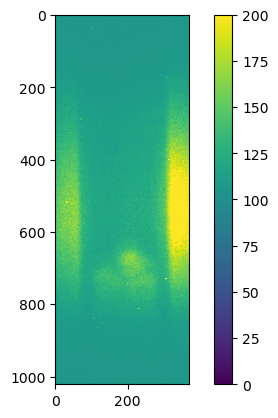

In [17]:
###################### need to change start
crop = True
# crop = False
crop_left = 230#320
crop_right = 600#1080
crop_top = 0
crop_bottom = -1
# crop_left = 550
# crop_right = 1300
# crop_top = 300
# crop_bottom = 1700
###################### need to change end
# scan_crop = rocku.crop(scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
_scan_crop_min = rocku.crop(_scan_min, crop_left, crop_right, crop_top, crop_bottom, crop)
print("ROI:")
plt.imshow(_scan_crop_min, vmin=0, vmax=200)
plt.colorbar()
plt.show()

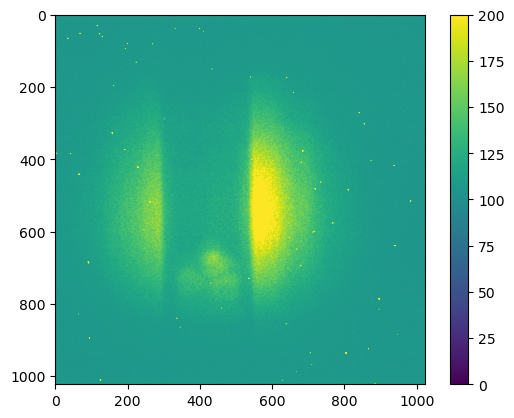

In [18]:
plt.imshow(_scan_raw[0], vmin=0, vmax=200)
plt.colorbar()
plt.show()

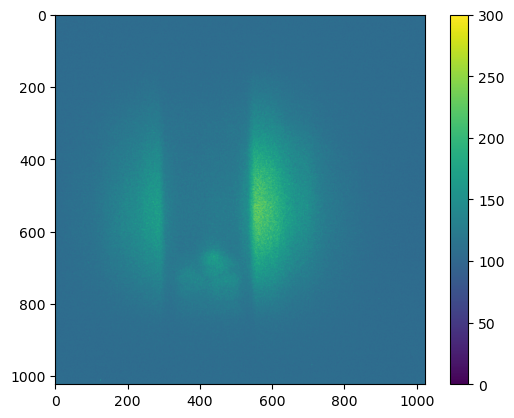

In [21]:
_scan_raw_clean = tomopy.remove_outlier(_scan_raw, 20, size=3).astype(np.ushort)
plt.imshow(_scan_raw_clean[0], vmin=0, vmax=300)
plt.colorbar()
plt.show()

# Normalize the selected list

In [22]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [32]:
scan_list = os.listdir("/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized_1st")
scan_list = sorted(scan_list)

In [33]:
to_rmv = [
    '2024_11_02_heating_to_650C',
    '2024_11_02_heating_to_700C',
    '2024_11_02_hold_to_700C_17',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

27
24


['2024_11_02_hold_to_700C_11',
 '2024_11_02_hold_to_700C_12',
 '2024_11_02_hold_to_700C_13',
 '2024_11_02_hold_to_700C_14',
 '2024_11_02_hold_to_700C_15',
 '2024_11_02_hold_to_700C_16',
 '2024_11_02_hold_to_700C_18',
 '2024_11_02_hold_to_700C_19',
 '2024_11_02_hold_to_700C_20',
 '2024_11_02_hold_to_700C_21',
 '2024_11_02_hold_to_700C_22',
 '2024_11_02_hold_to_700C_23',
 '2024_11_02_hold_to_700C_24',
 '2024_11_02_hold_to_700C_25',
 '2024_11_02_hold_to_700C_26',
 '2024_11_02_hold_to_700C_27',
 '2024_11_02_hold_to_700C_28',
 '2024_11_02_hold_to_700C_29',
 '2024_11_02_hold_to_700C_30',
 '2024_11_02_hold_to_700C_31',
 '2024_11_02_hold_to_700C_32',
 '2024_11_02_hold_to_700C_33',
 '2024_11_02_hold_to_700C_34',
 '2024_11_02_hold_to_700C_35']

In [ ]:
ignore_dc = True
# ignore_dc = False
outlier_rmv_size = 4
gamma_diff_raw = 10
gamma_diff_norm = 0.1
##################################################
for each_scan in scan_list:
    scan_dir = os.path.join(scan_loc, each_scan)
    fname_list = sorted(os.listdir(scan_dir))
    scan_exposure_list = rocku.get_exposure_list(fname_list)
    exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
    save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + each_scan# + '_Right'
    print("######################### Normalizing and saving to: '{}'".format(save_to))
    for each_exposure in exposure_list:
        if len(exposure_list) > 1:
            print("##### Exposure time: {}".format(each_exposure))
        _fname_list = rocku.filter_list(fname_list, each_exposure)
        _ob_list = rocku.filter_list(ob_list, each_exposure)
        _dc_list = rocku.filter_list(dc_list, each_exposure)
        ######### OB
        _ob_raw = rocku.read_tiff_stack(ob_dir, _ob_list)
        print(_ob_raw.shape)
        _ob_crop = rocku.crop(_ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _ob_crop = tomopy.remove_outlier(_ob_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
        ######### DC
        _dc_raw = rocku.read_tiff_stack(dc_dir, _dc_list)
        print(_dc_raw.shape)
        _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, _fname_list[0]))
        _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        if not ignore_dc:
            _dc_crop = rocku.crop(_dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _dc_crop = tomopy.remove_outlier(_dc_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, _dc_crop)
            # _dc_med = _dc_med - 2
        else:
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, None)
        ######### Scan
        for each_f in tqdm(_fname_list):
            _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, each_f))
            # print(_scan_raw.shape)
            _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _scan_crop = tomopy.remove_outlier(_scan_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            if not ignore_dc:
                _scan_mi_dc = _scan_crop - _dc_med 
            else:
                _scan_mi_dc = _scan_crop[:]
            _scan_norm = np.true_divide(_scan_mi_dc, _ob_mi_dc, dtype=np.float32)
            _scan_norm = tomopy.remove_neg(_scan_norm, val=0.0)
            _scan_norm = np.nan_to_num(_scan_norm, copy=True, nan=0.0, posinf=1, neginf=1)
            _scan_norm = tomopy.remove_outlier(_scan_norm, gamma_diff_norm, size=outlier_rmv_size)
            # _scan_norm = np.clip(_scan_norm, a_min=-0.1, a_max=1.1)
            _scan_norm = np.flipud(_scan_norm)
            # _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop, _ob_crop, _dc_crop)
            # Save files
            save_to_fname = save_to + "/" + each_f
            dxchange.write_tiff(_scan_norm, fname=save_to_fname, overwrite=True)

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_11'
200


(200, 1023, 1024)


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

200


(200, 1023, 1024)
OB stack combined by median.


 51%|███████████████████▉                   | 4592/9001 [07:30<06:27, 11.37it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 